<a href="https://colab.research.google.com/github/dscoool/chungbuk/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리 Data Preprocessing 와 기계학습

수강생 여러분 안녕하세요? 
이번 시간에는 titanic.csv 데이터셋을 이용해서 </br>
a. 간단한 데이터 전처리 </br>
b. 데이터 시각화(차트 그리기) </br> 
c. 데이터 분석(Data Analysis, 통계 지표 구하기) </br>
d. 학습/테스트 데이터셋 나누기 </br>
e. 기계학습(keras, tensorflow)으로 모델 학습 및 값 예측하기 </br>
f. 인공신경망(뉴럴네트워크, Neural Network)으로 모델 학습 및 값 예측하기 </br>

를 실습해 보도록 하겠습니다!!
이론적인 지식과 잘 매칭해 보시고, 우선 keras와 tensorflow를 돌려 보는 것을
목표로 하도록 할게요!!

그럼 시작해 볼까요? 

[Reference: https://code.visualstudio.com/docs/datascience/data-science-tutorial]


* titanic3.csv를 다운로드받아 .ipynb 동일 폴더로 복사합시다.
파일을 'data'라는 변수에 불러옵니다.

* 다운로드:   https://hbiostat.org/data/repo/titanic3.csv

* 필요한 경우 !pip install pandas numpy 명령어를 통해 pandas와 numpy를 설치해 주세요!!

In [1]:
# !pip install pandas numpy
import pandas as pd
import numpy as np
data = pd.read_csv('http://raw.githubusercontent.com/dscoool/chungbuk/main/titanic3.csv')

VARIABLES 탭( {x} )의 'DATA'를 클릭하여 데이터를 확인합시다!!
-> DATA 더블클릭!!


In [4]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN



## 데이터 클렌징(Data Cleansing)

자세히 보면 물음표(?) 값이 군데군데 있는 것을 알 수 있습니다. 이를 NaN값으로 바꿔주도록 합시다.
그리고 "age"열과 "fare"열은 float64 형태(소수점 데이터형)으로 변환시켜 줍니다.

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

불러온 데이터를 전처리했으니,

이것이 대략적으로 어떤 형태를 띠고 있는지 그래프를 그려 봅시다.

seaborn이라는 모듈을 이용합니다. (필요시 설치 !pip install seaborn)

- violinplot (인구 분포를 그리는 종 모양의 그래프) x 2개
- pointplot (x,y값 관계를 보여 주는 점 모양의 그래프) x 3개



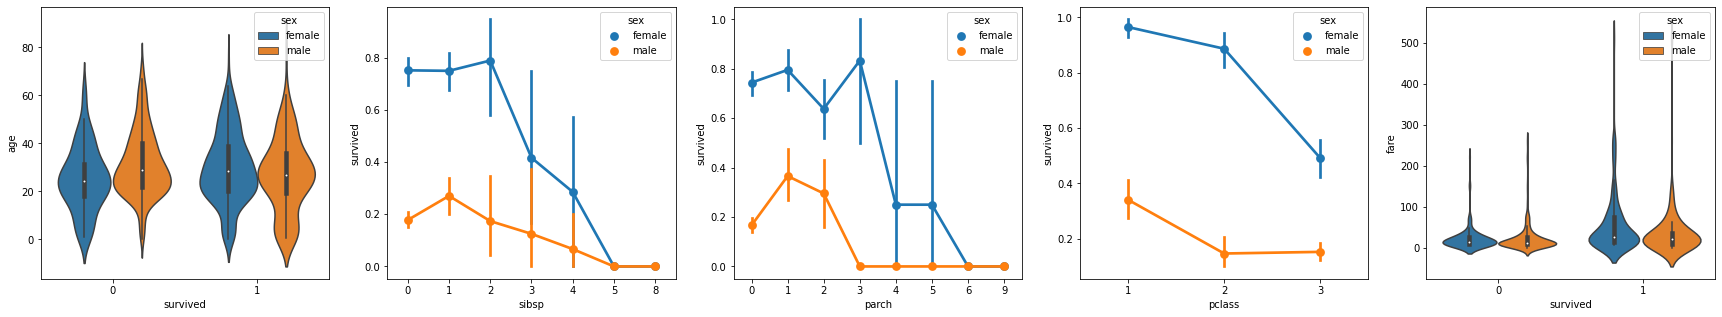

In [5]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

'male'값을 1로, 'female'값을 0으로 대체시켜 줍시다!!

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

이제 간단한 데이터 분석(Data Analysis)를 해 봅시다.
타이타닉 생존자(survived)와 각 변수 간의 상관관계를 구해 봅시다. (correlation)


In [7]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


데이터 분석을 계속해 봅시다!!
'relatives'(친척) 열을 추가하기 위해, 'sibsp'열과 'parch'열을 더해서 0이 넘으면 1로 표기,
0이 넘지 않으면(음수이면) 0으로 표기하는 'relatives'열을 새로 생성합니다.

다시 위에서 시행했던 'survived'행과의 상관관계를 구해 봅시다!!

In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


데이터프레임 'data'의 'sex', 'pclass','age','relatives','fare','survived' 열의 NaN 값을 모두 제거해 줍니다!!

In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

이제 간단한 기계학습(머신러닝, Machine Learning)을 돌려 봅시다!!

데이터셋을 8:2로 나누어서, 8은 기계학습 모델을 학습시키는 데에, 

2는 학습된 기계학습 모델을 사용하여 어떤 사람이 생존할 것인지 아닐 것인지를 '예측'하는 데 사용해 보도록 합시다!!


아래와 같이 Scikit_learn (sklearn)모듈을 사용하여
x, y 데이터를 각각 train (학습)과 test(테스트, 예측)로 나눠 보도록 합시다.
train dataset과 test dataset의 비율은 8:2 입니다.

In [10]:
# !pip install sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

x_train열과 x_test열을 normalise(정규분포로 바꿈) 해봅시다!!
X_Train (대문자 X)는 x_train 테이블을 범위가 일정하도록 교정한 것입니다.
Y_Train (대문자 X)는 y_train 테이블을 범위가 일정하도록 교정한 것입니다.


아래 JUPYTER:VARIABLES를 클릭하여 확인해 보세요!!

###### (Next, you'll normalize the inputs such that all features are treated equally. For example, within the dataset the values for age range from ~0-100, while gender is only a 1 or 0. By normalizing all the variables, you can ensure that the ranges of values are all the same. Use the following code in a new code cell to scale the input values.)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

자, 이제 Gaussian Naive Bayes 모델을 사용하여

모델을 학습시켜 봅시다!!

전처리한 X_train, y_train 데이터셋을 입력하여(feeding, 데이터를 먹이다 라는 뜻을 가지고 있음) 기계학습 모델을 학습시켜 줍니다. (Machine Learning!! :)

* Gaussian Naive Bayes 이론 참고자료: https://topo314.tistory.com/72

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
#학습 완료되면 모델이 아래 표시됩니다!!

GaussianNB()

앞에서 80%의 데이터셋은 학습을 하는 데 사용하고,
나머지 20%의 데이터셋은 완성된 모델이 잘 맞는지 정확도를 측정하기 위해
테스트하는 데 사용하도록 나누어 두었습니다!!

이제 학습 단계에서 사용하지 않은 테스트 데이터셋을(test dataset)
사용하여 모델이 얼마나 정확한지 테스트를 해 봅시다!!


In [ ]:
from sklearn import metrics
predict_test = model.predict(X_test)

print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


* predict_test = 기계가 예측한 값
* test 실제 원래 데이터에 존재하던 값
*  Σ [(y_test)^2 - (predict_test)^2] / (데이터행의 수)
* 이렇게 해서 정확도(accuracy_score를 구합니다)
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


자, 이제는 Gaussian Naive Bayes 외에 인공신경망(Neural Network)모델을 사용하여
기계 학습 실습을 더 해 봅시다!!

* 원본 문서: https://code.visualstudio.com/docs/datascience/data-science-tutorial

* !pip install 명령어를 이용하여 keras와 tensorflow를 설치해 줍시다!!

Sequential 모델을 사용하여 간단한 인공신경망을 실행해 봅시다.
keras에서 불러와 보도록 할게요!!

In [13]:
# !pip install keras #keras install
# !pip install tensorflow #tensorflow install
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

인공신경망 layer (기계학습의 겹)을 지정해 줍니다.
값이 5개인 기계학습 모델을 트레이닝시키므로,

* 5개의 입력값 - relu

* 이어지는 5개의 입력값 - relu

* 1개의 출력값 - sigmoid (함수의 형태)

으로 구성됩니다.


In [14]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

인공신경망(Neural Network) 모델의 형태(가로, 세로, 겹수)를 체크해 봅시다.


###### (The first layer will be set to have a dimension of 5, since you have five inputs: sex, pclass, age, relatives, and fare. The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive. The middle layer was kept at 5 for simplicity, although that value could have been different.)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


** 지금은 이해가 덜 되어도, 일단 돌려 보도록 할게요!! :)


모델을 피팅(fit)시킵니다.

기계학습의 형태를 

5 x 30, 5 x 30, 1 x 6 으로 정의했는데,

각 뉴런(neuron)간 이어진 가중치(weight, W)를 조금씩 조정해 가며 모델을 학습 시키는 과정을
50번 (epoch=50) 반복합니다!!

In [16]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)
#epoch (학습 회차)가 올라갈수록 정확도가 올라가는 것을 관찰할 수 있어요!!

Epoch 1/50
27/27 [==============================] - 2s 47ms/step - loss: 0.6923 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5897
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6495
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7285
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7620
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7679
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7703
Epoch 11/50
27/27 

학습이 끝났으므로,
완성된 모델을 사용하여 예측(predict) 해 봅니다!!


y_test (테스트 데이터셋, 원래 데이터에 존재하던 값)과 y_pred(기계가 예측한 값)을
비교하여 정확도를 측정해 봅시다.


In [17]:
#예측치 계산
y_pred = np.argmax(model.predict(X_test), axis=-1)
#새로 예측한 값을 원래 존재하던 데이터와 비교하여 얼마나 정확히 예측했는지 정확도 도출
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 1s 200ms/step


NameError: ignored

* 이 코드는 MS의 data-science-tutorial을 참고한 것입니다.
* 타이타닉 머신러닝, 뉴럴네트워크, 기계학습, 데이터 전처리
* Reference:
https://code.visualstudio.com/docs/datascience/data-science-tutorial

### 수강생 여러분 수고하셨습니다!!

##### 강사 정재민